In [3]:
import project_metrics.project_metrics as metrics
import numpy as np
import pandas as pd
import pickle
from os.path import exists

In [3]:
df_train = pd.read_csv("Assets/train.csv")
df_val= pd.read_csv("Assets/val.csv")
df_test = pd.read_csv("Assets/test.csv")

In [4]:
df_train.drop("INDEX", inplace=True, axis =1)
df_val.drop("INDEX", inplace=True, axis =1)
df_test.drop("INDEX", inplace=True, axis =1)

df_train.drop("Unnamed: 0", inplace=True, axis =1)
df_val.drop("Unnamed: 0", inplace=True, axis =1)
df_test.drop("Unnamed: 0", inplace=True, axis =1)

df_train.drop("IND_BOM_1_2", inplace=True, axis =1)
df_val.drop("IND_BOM_1_2", inplace=True, axis =1)
df_test.drop("IND_BOM_1_2", inplace=True, axis =1)

In [5]:
y_train = df_train["IND_BOM_1_1"].values
y_val = df_val["IND_BOM_1_1"].values
y_test = df_test["IND_BOM_1_1"].values

In [6]:
df_train.drop("IND_BOM_1_1", inplace=True, axis =1)
df_val.drop("IND_BOM_1_1", inplace=True, axis =1)
df_test.drop("IND_BOM_1_1", inplace=True, axis =1)

In [7]:
x_train = df_train.values
x_val = df_val.values
x_test = df_test.values

# Final Project

## Gradient-boosting

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

MODELS_PATH = "Models/MLP"
HISTORY_PATH = f"{MODELS_PATH}/history"
MODEL_PATH = f"{MODELS_PATH}/model"

### Experimento1

Model was already trained


True

   1/3041 [..............................] - ETA: 6:17

2022-09-27 23:03:24.314716: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94575600 exceeds 10% of free system memory.


3041/3041 [==============================] - 2s 728us/step
Matriz de confusão no conjunto de teste:


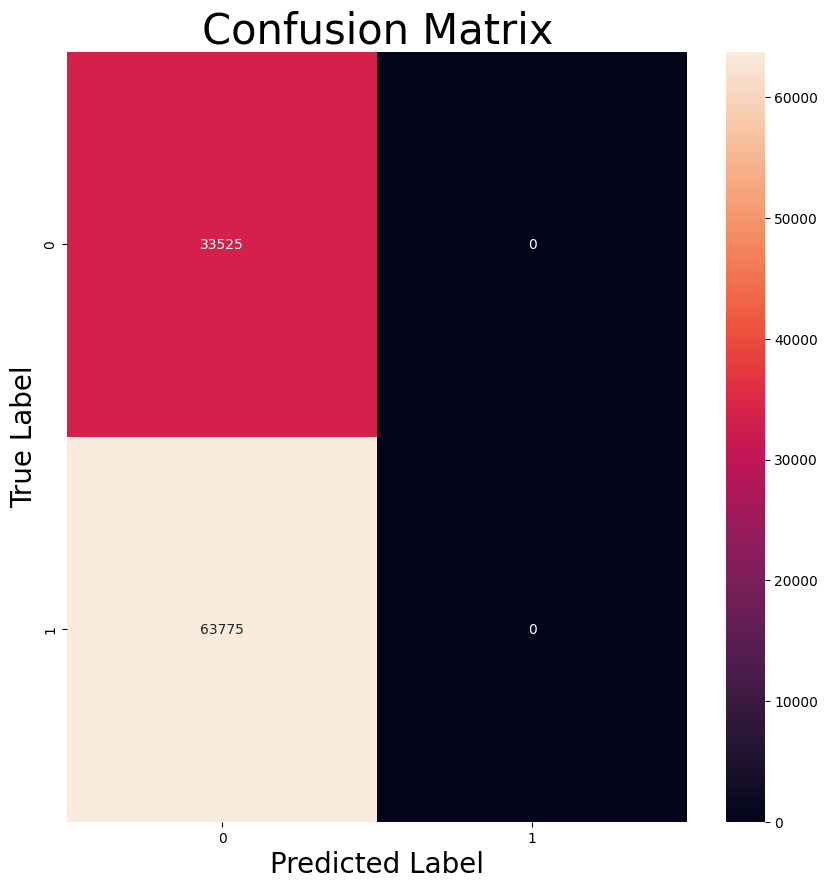


Train Loss:       0.2191
Validation Loss:  0.2211

Performance no conjunto de teste:


/home/yesternight/Desktop/neural-networks/neural-networks/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


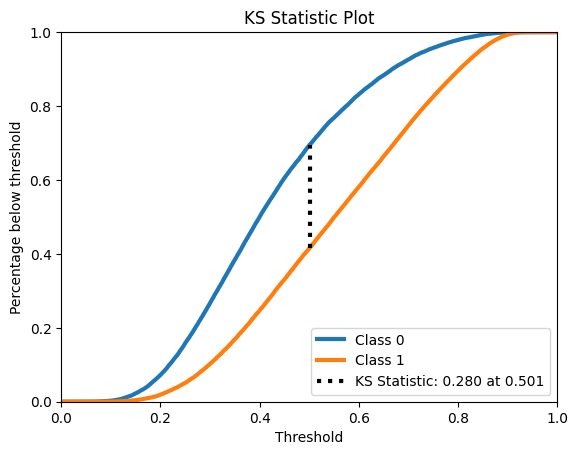


Accuracy:         0.3446
Recall:           0.0000
Precision:        0.0000
F1:               0.0000
AUROC:            0.6919
AUPR:             0.8040


In [11]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = np.argmax(y_pred_scores, axis=1)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

### Experimento2

Epoch 1/100


2022-09-27 23:03:28.891898: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 247955256 exceeds 10% of free system memory.


3980/3986 [============================>.] - ETA: 0s - loss: 0.2286

2022-09-27 23:03:33.653987: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 123976656 exceeds 10% of free system memory.


3986/3986 [==============================] - 6s 1ms/step - loss: 0.2286 - val_loss: 0.2248
Epoch 2/100
3986/3986 [==============================] - 6s 2ms/step - loss: 0.2239 - val_loss: 0.2233
Epoch 3/100
3986/3986 [==============================] - 7s 2ms/step - loss: 0.2220 - val_loss: 0.2221
Epoch 4/100
3986/3986 [==============================] - 7s 2ms/step - loss: 0.2211 - val_loss: 0.2218
Epoch 5/100
3986/3986 [==============================] - 5s 1ms/step - loss: 0.2202 - val_loss: 0.2211
Epoch 6/100
3986/3986 [==============================] - 5s 1ms/step - loss: 0.2195 - val_loss: 0.2214
Epoch 7/100
3986/3986 [==============================] - 5s 1ms/step - loss: 0.2190 - val_loss: 0.2217
Epoch 8/100
3986/3986 [==============================] - 5s 1ms/step - loss: 0.2186 - val_loss: 0.2217
Epoch 9/100
3955/3986 [============================>.] - ETA: 0s - loss: 0.2181

KeyboardInterrupt: 

In [ ]:
# Fazer predições no conjunto de teste
y_pred_scores = classifier.predict(x_test)
y_pred_class = np.argmax(y_pred_scores, axis=1)
y_pred_scores_0 = 1 - y_pred_scores
y_pred_scores = np.concatenate([y_pred_scores_0, y_pred_scores], axis=1)

## Matriz de confusão
print('Matriz de confusão no conjunto de teste:')
metrics.plot_confusion_matrix(y_test, y_pred_class)

## Resumo dos resultados
losses = metrics.extract_final_losses(history)
print()
print("{metric:<18}{value:.4f}".format(metric="Train Loss:", value=losses['train_loss']))
print("{metric:<18}{value:.4f}".format(metric="Validation Loss:", value=losses['val_loss']))
print('\nPerformance no conjunto de teste:')
accuracy, recall, precision, f1, auroc, aupr = metrics.compute_performance_metrics(y_test, y_pred_class, y_pred_scores)
metrics.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)